<a href="https://colab.research.google.com/github/ShreyaShah108/Synapse_LP/blob/week-3/Copy_of_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3**

## **DJS Synapse Learning Period**
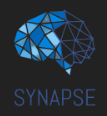

In the task for this week, we will be exploring another machine learning model called the decision tree classifier. We will also learn hyperparameter tuning using ensemble methods(Bagging & Boosting) and Decision Tree Pruning. 

# Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [1]:
#write code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/gdrive")
df=pd.read_csv("/content/gdrive/MyDrive/synapse_w3/titanic_data.csv")
df.head()

Mounted at /content/gdrive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [2]:
import re
def titanic_preprocessing_pipeline(df):
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1 solution NB
  #return the dataframe
  title = []
  for row in df.Name:
    title_search = re.search('(\w+)\.', str(row))
    if title_search:
      title.append(title_search.group())
  df['Title'] = title
  df.drop(['PassengerId', 'Ticket', 'Name','Cabin'], axis=1,inplace = True)
  mode = df.mode()['Embarked'][0]
  df['Embarked'] = df['Embarked'].fillna(mode)
  mean = df.mean()['Age']
  df['Age'] = df['Age'].fillna(mean)
  df
  sum_column = df["SibSp"] + df["Parch"]
  df["Family_members"] = sum_column
  for col in df.columns:
    if col=='Age' or col=='Fare' or col=='Family_members':
      df[col] = (df[col] - df[col].min())/(df[col].max()-df[col].min())
  df=pd.get_dummies(data=df,columns=['Pclass','Sex','Title','Embarked']) 
  return df  
df = titanic_preprocessing_pipeline(df)
 #remove this line after writing the code

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  from ipykernel import kernelapp as app


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [3]:
#write code here
ydf = df[['Survived']].copy()
ydf

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


<b>remove the y_label (survived) from the dataframe</b>

In [4]:
#write code here
df.drop(['Survived'],axis=1, inplace = True)
df

,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,1,0,0.014151,0.1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0.472229,1,0,0.139136,0.1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0.321438,0,0,0.015469,0.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.434531,1,0,0.103644,0.1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0.434531,0,0,0.015713,0.0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0,0,0.025374,0.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
887,0.233476,0,0,0.058556,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
888,0.367921,1,2,0.045771,0.3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
889,0.321438,0,0,0.058556,0.0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [5]:
#write code here
from sklearn.model_selection import train_test_split
df_train, df_test, ydf_train, ydf_test = train_test_split(df, ydf, test_size=0.3, random_state=100)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [6]:
#write code here
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_train, ydf_train)

<b>print the test accuracy and train accuracy here</b>

In [7]:
#write code here
# from sklearn import metrics
# y_pred = clf.predict(df_test)
# pred = clf.predict(df_train)
# print('test Accuracy Score:', metrics.accuracy_score(ydf_test,y_pred))
# print('train Accuracy Score:', metrics.accuracy_score(ydf_train,pred))
print("train accuracy: "+str(clf.score(df_train, ydf_train)))
print("test accuracy: "+str(clf.score(df_test, ydf_test)))

train accuracy: 0.9903691813804173
test accuracy: 0.7798507462686567


Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

In [8]:
#write code here
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(df_train, ydf_train)
print (f'Train Accuracy - : {rf_Grid.score(df_train,ydf_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(df_test,ydf_test):.3f}')


Fitting 3 folds for each of 320 candidates, totalling 960 fits
Train Accuracy - : 0.838
Test Accuracy - : 0.825


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


### 2. Boosting

In [9]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [10]:
abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,df,ydf,scoring='accuracy',cv=10))
abc.fit(df,ydf)
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [11]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
grid_result1 = grid_search.fit(df_train, ydf_train)
print("Train Accuracy: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Train Accuracy: 0.821813 using {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
grid_result2 = grid_search.fit(df_test, ydf_test)
print("Test Accuracy: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.824786 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


### 3. Pruning Techniques

In [13]:
#write code here
from sklearn.model_selection import ParameterGrid
ccp_alphas = clf.cost_complexity_pruning_path(df_train, ydf_train)["ccp_alphas"]
ccp_alphas

array([0.        , 0.00016051, 0.00018344, 0.00021167, 0.00050447,
       0.00070815, 0.00078585, 0.00082261, 0.00096308, 0.00096308,
       0.00096308, 0.00098092, 0.00100894, 0.0010548 , 0.0011771 ,
       0.00125637, 0.00128411, 0.00128411, 0.00128411, 0.00133761,
       0.00133761, 0.00133761, 0.00134248, 0.00137583, 0.00137583,
       0.00137853, 0.00140449, 0.00143316, 0.00145921, 0.00145991,
       0.0015287 , 0.0015287 , 0.00153826, 0.00160514, 0.00167065,
       0.00181092, 0.00184486, 0.00191088, 0.00195164, 0.00196994,
       0.00201742, 0.00214018, 0.00214018, 0.00214018, 0.00231328,
       0.00242554, 0.00245917, 0.00263994, 0.00280899, 0.00283259,
       0.00287333, 0.00296955, 0.00298344, 0.00306204, 0.00320177,
       0.00323542, 0.00414048, 0.00453063, 0.00587304, 0.005965  ,
       0.00836009, 0.01332438, 0.013849  , 0.01561057, 0.03818736,
       0.13979133])

In [14]:
from sklearn.metrics import make_scorer, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
ccp_alpha_grid_search = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=50),
    scoring=make_scorer(accuracy_score),
    param_grid = ParameterGrid({"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),
)
ccp_alpha_grid_search.fit(df_train, ydf_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=50),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x7f72d70947d0>,
             scoring=make_scorer(accuracy_score))

In [15]:
ccp_alpha_grid_search.best_params_

{'ccp_alpha': 0.0045306270387821534}

In [16]:
best_ccp_alpha_tree = ccp_alpha_grid_search.best_estimator_

In [17]:
print("train report: "+classification_report(ydf_train, best_ccp_alpha_tree.predict(df_train)))

train report:               precision    recall  f1-score   support

           0       0.85      0.91      0.88       390
           1       0.83      0.73      0.78       233

    accuracy                           0.84       623
   macro avg       0.84      0.82      0.83       623
weighted avg       0.84      0.84      0.84       623



In [18]:
print("test report: "+classification_report(ydf_test, best_ccp_alpha_tree.predict(df_test)))

test report:               precision    recall  f1-score   support

           0       0.80      0.89      0.85       159
           1       0.81      0.68      0.74       109

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



## Optimal model

After studying these techniques, analyse which method gives you the best accuracy and choose it as your final model.


Boosting gives the best test accuracy (82.4786%) so it is the optimal final model.

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Naive Bayes Algortihm**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2022 - 2023